<a href="https://colab.research.google.com/github/Anjana2002/Language-Identification-for-Malayalam-English-Code-Mixed-Text/blob/main/modeling/CamemBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CamemBert MODELING

In [1]:
!pip install transformers
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
  

In [2]:
import pandas as pd
import ast
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import torch
import logging
from simpletransformers.ner import NERModel

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
df = pd.read_csv('ner_dataset.csv')
df["words"] = df["words"].fillna("").astype(str)
df.head()


,sentence_id,words,labels
0,1,nayanthara,mal
1,1,kettiyathin,mal
2,1,shesham,mal
3,1,kanunnavar,mal
4,2,00:12,univ


In [4]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Training size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

# Extract unique labels from the dataset
unique_labels = list(df["labels"].unique())
print("Unique labels in the dataset:", unique_labels)

Training size: 263461
Validation size: 32933
Test size: 32933
Unique labels in the dataset: ['mal', 'univ', 'eng', 'mix', 'acr']


In [10]:
model_args = {
    "overwrite_output_dir": True,
    "reprocess_input_data": True,
    "save_steps": -1,
    "num_train_epochs": 5,
    "train_batch_size": 16,
    "eval_batch_size": 16,
    "max_seq_length": 128,
    "learning_rate": 2e-5,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "evaluate_during_training": True,
    "output_dir": "outputs/",
    "best_model_dir": "outputs/best_model/",
    "labels_list": unique_labels,  # Add this line with your labels
}

camem = NERModel(
    model_type="camembert",
    model_name="camembert-base",
    args=model_args,
    use_cuda=torch.cuda.is_available()
)


config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:433: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  warnings.warn(


In [11]:
train_data = train_df[["sentence_id", "words", "labels"]]
val_data = val_df[["sentence_id", "words", "labels"]]
print(train_data.head())
print(val_data.head())

        sentence_id   words labels
199781        33943  aanenn    mal
131447        21490       %   univ
204812        34786     dhe    mal
27121          4977    next    eng
85254         14281   robin    eng
        sentence_id      words labels
258702        44189        njn    mal
56139          9908      react    eng
198375        33702          🤣   univ
324160        53398  thonnunn🤗    mal
263637        45105      😍😍😂😂😀   univ


In [12]:
# Ensure labels are consistent with the defined `labels_list`
assert set(train_data["labels"].unique()).issubset(set(unique_labels)), "Mismatch in train labels"
assert set(val_data["labels"].unique()).issubset(set(unique_labels)), "Mismatch in val labels"

In [13]:
camem.train_model(train_data, eval_data=val_data)

  0%|          | 0/52871 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/3305 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
example_sentence = "njn enn avide poyi, videoil njn kandu comedyu love 123 wait"
predictions, raw_outputs = camem.predict([example_sentence])  # Pass it as a list of strings
print("Predictions:", predictions)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

Predictions: [[{'njn': 'mal'}, {'enn': 'mal'}, {'avide': 'mal'}, {'poyi,': 'mal'}, {'videoil': 'mix'}, {'njn': 'mal'}, {'kandu': 'mal'}, {'comedyu': 'mix'}, {'love': 'eng'}, {'123': 'univ'}, {'wait': 'eng'}]]


In [ ]:
result, model_outputs, predictions =camem.eval_model(val_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1392 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:1303: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: eng seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: mal seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: mix seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: univ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages

In [ ]:

print("Evaluation Results:")
print(f"Precision: {result['precision']:.4f}")
print(f"Recall: {result['recall']:.4f}")
print(result)

Evaluation Results:
Precision: 0.9936
Recall: 0.9932
{'eval_loss': 0.025884638709927698, 'precision': 0.9936289407198564, 'recall': 0.9931925484024449, 'f1_score': 0.9934106966357945}


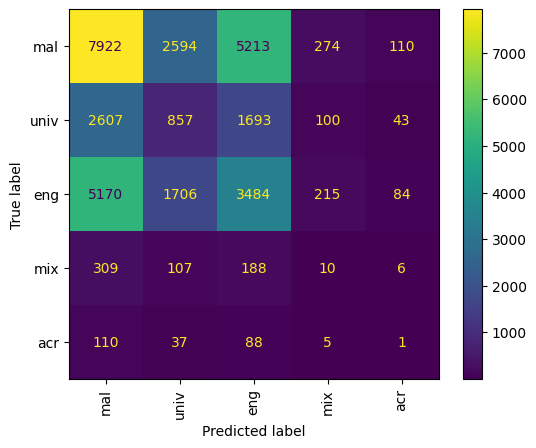

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from itertools import chain

# Extract true labels from val_data
true_labels = val_data["labels"].values.flatten()

# Flatten the model predictions
predictions_flat = list(chain.from_iterable(predictions))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions_flat, labels=unique_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap="viridis", xticks_rotation="vertical")
plt.show()

